In [24]:
import sys
from cleverminer import cleverminer
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import plotly.io as pio

# Correct method to read Excel files
file_path = 'NAPO_VSE_dotaznik.xlsx'


df = pd.read_excel(file_path)
print(df)


#Pro závěrečný projekt:
    #Další dataset => počet nemocnic v jednotlivých krajích (detaily/data na ÚZISU - Zdravotnická ročenka)
    #Otázky tipu dostatek lékařů na obyvatele? Dostupnost nemocnic na obyvatele
    #Výdaje podle věkové kategorie (čím starší, tím vyšší výdaje => od 60+ víc jak 50k) => návaznost na otázku, zda by si měli lidé platit dražší léčbu
    #Platy doktorů - vazba na péči doktorů a odchod do ciziny - porovnání s cizinou?


     id_respondenta pohlavi  vek vekova_kategorie  \
0       025y2-0ce-1    zena   39        35-44_let   
1       032y2-0ce-1    zena   42        35-44_let   
2       04gy2-0ce-1     muz   60        55-64_let   
3       05l03-0ce-1    zena   56        55-64_let   
4       06vx2-0ce-1     muz   73    65_a_vice_let   
...             ...     ...  ...              ...   
1022    zt743-0ce-1    zena   47        45-54_let   
1023    zuyx2-0ce-1    zena   53        45-54_let   
1024    zw4w2-0ce-1     muz   52        45-54_let   
1025    zwc13-0ce-1     muz   82    65_a_vice_let   
1026    zyzx2-0ce-1    zena   63        55-64_let   

                      nejvyssi_dokoncene_vzdelani  vzdelani_\n(rekod)  \
0         vyssi_odborne,_vysokoskolske_bakalarske              vs/vos   
1     stredoskolske_s_maturitou_(vcetne_nastavby)      ss_s_maturitou   
2               vysokoskolske_magisterske_a_vyssi              vs/vos   
3                          vyucen(a)_bez_maturity  zs/ss_bez_maturity  

EDA ANALYSIS

In [25]:
#info about our data - non-null values
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 90 columns):
 #   Column                                                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                         --------------  -----  
 0   id_respondenta                                                                                                                                                                                                 1027 non-null   object 
 1   pohlavi                                                                                                                                                                             

,id_respondenta,pohlavi,vek,vekova_kategorie,nejvyssi_dokoncene_vzdelani,vzdelani_\n(rekod),kraj,jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?,co_na_ceskem_zdravotnictvi_ocenujete?,co_byste_si_naopak_pral(a)_na_ceskem_zdravotnictvi_vylepsit?_,...,PODPORA_mene_zdrav_zarizeni,PODPORA_ruzne_pojisteni,PODPORA_zvyhodnene_ohleduplne_chovani,lecite_se_dlouhodobe_s_nejakym_onemocnenim?,pecujete_o_blizkou_osobu_s_chronickym_onemocnenim?,volbastrany_odpoved,ekonomicke_postaveni,cisty_prijem_domacnosti,neprojekcni_vaha_,prijem_kategorie
0,025y2-0ce-1,zena,39,35-44_let,"vyssi_odborne,_vysokoskolske_bakalarske",vs/vos,stredocesky_kraj,2,preciznost,kratsi_objednaci_terminy,...,spise_prijatelne,spise_neprijatelne,spise_prijatelne,ano,ne,"stacilo!_(kscm,_sd-sn,_csns)",soukromy/a_podnikatel(ka),50_000_kc_-_74_999_kc,1.029026,stredni_prijem
1,032y2-0ce-1,zena,42,35-44_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,stredocesky_kraj,3,kvalitni_odborniky,dostupnost_pece,...,spise_neprijatelne,spise_prijatelne,zcela_prijatelne,ne,ano,nevim/nechci_uvest,v_zamestnaneckem_pomeru,20_000_kc_-_49_999_kc,0.993580,stredni_prijem
2,04gy2-0ce-1,muz,60,55-64_let,vysokoskolske_magisterske_a_vyssi,vs/vos,ustecky_kraj,3,dostupnost,sluzby,...,spise_neprijatelne,spise_neprijatelne,spise_neprijatelne,ano,ne,"stacilo!_(kscm,_sd-sn,_csns)",v_zamestnaneckem_pomeru,odmitam_odpovedet,1.074070,neurceno
3,05l03-0ce-1,zena,56,55-64_let,vyucen(a)_bez_maturity,zs/ss_bez_maturity,stredocesky_kraj,2,"mame_hodne_vybornych_lekaru,_kvalitni_vybaveni",zkratit_cekaci_doby_na_odborna_vysetreni,...,spise_neprijatelne,spise_prijatelne,spise_neprijatelne,ano,ne,ano,nepracujici_duchodce/kyne,do_19_999_kc,0.968157,nizky_prijem
4,06vx2-0ce-1,muz,73,65_a_vice_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,praha,2,"ze_ma_mnoho_lekaru,_sester_a_dalsich_pracovnik...",moznost_vyberu_obvodniho_lekare_z_vetsi_nabidk...,...,spise_neprijatelne,spise_prijatelne,spise_prijatelne,ano,ne,pirati,nepracujici_duchodce/kyne,50_000_kc_-_74_999_kc,0.964880,stredni_prijem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,zt743-0ce-1,zena,47,45-54_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,stredocesky_kraj,3,"dostupnost,_kvalitu",osobni_pristup_zdravotniku,...,spise_neprijatelne,spise_prijatelne,zcela_prijatelne,ano,ne,"spolu_(ods,_kdu-csl,_top_09)",nezamestnany/a,20_000_kc_-_49_999_kc,0.991897,stredni_prijem
1023,zuyx2-0ce-1,zena,53,45-54_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,plzensky_kraj,2,pristupnost_zdravotni_pece_vsem,"vice_lekaru_v_ordinacich,_kratsi_objednaci_lhuty",...,nevim/nemam_nazor,spise_prijatelne,zcela_prijatelne,ano,ne,nevim/nechci_uvest,v_zamestnaneckem_pomeru,odmitam_odpovedet,1.018027,neurceno
1024,zw4w2-0ce-1,muz,52,45-54_let,vyucen(a)_bez_maturity,zs/ss_bez_maturity,praha,2,dostupnost,aby_se_zkratila_cekaci_doba_na_konkretni_vyset...,...,spise_neprijatelne,spise_prijatelne,zcela_prijatelne,ne,ano,"spolu_(ods,_kdu-csl,_top_09)",v_zamestnaneckem_pomeru,50_000_kc_-_74_999_kc,1.012646,stredni_prijem
1025,zwc13-0ce-1,muz,82,65_a_vice_let,vysokoskolske_magisterske_a_vyssi,vs/vos,liberecky_kraj,2,komplexnost,duslednou_kontrolu_vynalozenych_prostredku.,...,spise_neprijatelne,spise_prijatelne,zcela_prijatelne,ano,ne,"spolu_(ods,_kdu-csl,_top_09)",nepracujici_duchodce/kyne,75_000_kc_-_99_999_kc,1.120089,vysoky_prijem


In [26]:
#Numerical only
df.describe()


,vek,jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?,HODNOCENI_zdravotni_pojistovny,HODNOCENI_zdravotnicka_zarizeni_/_lekari,HODNOCENI_ministerstvo_zdravotnictvi,HODNOCENI_nemocnice,HODNOCENI_prakticky_lekar,HODNOCENI_ambulantni_specialiste,neprojekcni_vaha_
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,50.451801,2.770204,2.733204,2.752678,3.537488,2.545278,2.099318,2.470302,1.000000
std,18.108735,0.938544,1.020691,1.013159,1.103471,1.014824,1.076902,1.071446,0.058572
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.873954
25%,36.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.962059
50%,50.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,0.993427
75%,66.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.024719
max,90.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.206060


In [27]:
#'O' for OBJECTS
df.describe(include='O')

,id_respondenta,pohlavi,vekova_kategorie,nejvyssi_dokoncene_vzdelani,vzdelani_\n(rekod),kraj,co_na_ceskem_zdravotnictvi_ocenujete?,co_byste_si_naopak_pral(a)_na_ceskem_zdravotnictvi_vylepsit?_,VADI_platby_za_bezne_sluzby,VADI_protekce,...,PODPORA_prodlouzeni_cekaci_doby,PODPORA_mene_zdrav_zarizeni,PODPORA_ruzne_pojisteni,PODPORA_zvyhodnene_ohleduplne_chovani,lecite_se_dlouhodobe_s_nejakym_onemocnenim?,pecujete_o_blizkou_osobu_s_chronickym_onemocnenim?,volbastrany_odpoved,ekonomicke_postaveni,cisty_prijem_domacnosti,prijem_kategorie
count,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,...,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027
unique,1027,2,6,5,3,14,733,809,2,2,...,5,5,5,5,2,2,10,9,8,4
top,zyzx2-0ce-1,zena,65_a_vice_let,vyucen(a)_bez_maturity,zs/ss_bez_maturity,stredocesky_kraj,nic,nevim,ne,ne,...,zcela_neprijatelne,spise_neprijatelne,spise_prijatelne,spise_prijatelne,ano,ne,ano,v_zamestnaneckem_pomeru,20_000_kc_-_49_999_kc,stredni_prijem
freq,1,528,264,379,440,136,67,51,756,759,...,380,396,385,392,515,915,298,453,487,711


In [28]:
df.head()

,id_respondenta,pohlavi,vek,vekova_kategorie,nejvyssi_dokoncene_vzdelani,vzdelani_\n(rekod),kraj,jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?,co_na_ceskem_zdravotnictvi_ocenujete?,co_byste_si_naopak_pral(a)_na_ceskem_zdravotnictvi_vylepsit?_,...,PODPORA_mene_zdrav_zarizeni,PODPORA_ruzne_pojisteni,PODPORA_zvyhodnene_ohleduplne_chovani,lecite_se_dlouhodobe_s_nejakym_onemocnenim?,pecujete_o_blizkou_osobu_s_chronickym_onemocnenim?,volbastrany_odpoved,ekonomicke_postaveni,cisty_prijem_domacnosti,neprojekcni_vaha_,prijem_kategorie
0,025y2-0ce-1,zena,39,35-44_let,"vyssi_odborne,_vysokoskolske_bakalarske",vs/vos,stredocesky_kraj,2,preciznost,kratsi_objednaci_terminy,...,spise_prijatelne,spise_neprijatelne,spise_prijatelne,ano,ne,"stacilo!_(kscm,_sd-sn,_csns)",soukromy/a_podnikatel(ka),50_000_kc_-_74_999_kc,1.029026,stredni_prijem
1,032y2-0ce-1,zena,42,35-44_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,stredocesky_kraj,3,kvalitni_odborniky,dostupnost_pece,...,spise_neprijatelne,spise_prijatelne,zcela_prijatelne,ne,ano,nevim/nechci_uvest,v_zamestnaneckem_pomeru,20_000_kc_-_49_999_kc,0.993580,stredni_prijem
2,04gy2-0ce-1,muz,60,55-64_let,vysokoskolske_magisterske_a_vyssi,vs/vos,ustecky_kraj,3,dostupnost,sluzby,...,spise_neprijatelne,spise_neprijatelne,spise_neprijatelne,ano,ne,"stacilo!_(kscm,_sd-sn,_csns)",v_zamestnaneckem_pomeru,odmitam_odpovedet,1.074070,neurceno
3,05l03-0ce-1,zena,56,55-64_let,vyucen(a)_bez_maturity,zs/ss_bez_maturity,stredocesky_kraj,2,"mame_hodne_vybornych_lekaru,_kvalitni_vybaveni",zkratit_cekaci_doby_na_odborna_vysetreni,...,spise_neprijatelne,spise_prijatelne,spise_neprijatelne,ano,ne,ano,nepracujici_duchodce/kyne,do_19_999_kc,0.968157,nizky_prijem
4,06vx2-0ce-1,muz,73,65_a_vice_let,stredoskolske_s_maturitou_(vcetne_nastavby),ss_s_maturitou,praha,2,"ze_ma_mnoho_lekaru,_sester_a_dalsich_pracovnik...",moznost_vyberu_obvodniho_lekare_z_vetsi_nabidk...,...,spise_neprijatelne,spise_prijatelne,spise_prijatelne,ano,ne,pirati,nepracujici_duchodce/kyne,50_000_kc_-_74_999_kc,0.964880,stredni_prijem


In [29]:
#Check the shape of data
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 1027 rows and 90 columns.


In [30]:
df.isnull().sum()

id_respondenta                 0
pohlavi                        0
vek                            0
vekova_kategorie               0
nejvyssi_dokoncene_vzdelani    0
                              ..
volbastrany_odpoved            0
ekonomicke_postaveni           0
cisty_prijem_domacnosti        0
neprojekcni_vaha_              0
prijem_kategorie               0
Length: 90, dtype: int64

In [31]:
df['pohlavi'].value_counts()


pohlavi
zena    528
muz     499
Name: count, dtype: int64

In [32]:
df['pohlavi'].value_counts(normalize=True)

pohlavi
zena    0.514119
muz     0.485881
Name: proportion, dtype: float64

<Axes: ylabel='count'>

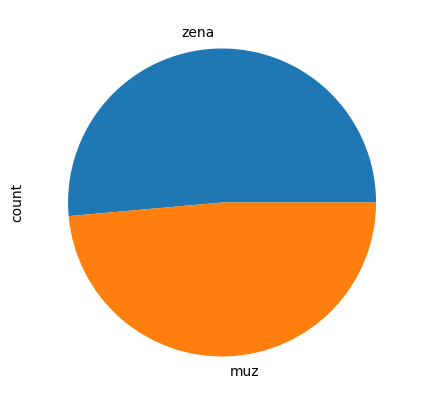

In [33]:
df['pohlavi'].value_counts().plot(kind='pie', figsize=(5,5), )

#proporcionální 

In [34]:
df['vekova_kategorie'].value_counts(normalize=True)

#spíše více starších lidí (40% 55+ let)

vekova_kategorie
65_a_vice_let    0.257059
45-54_let        0.188900
35-44_let        0.176241
55-64_let        0.148978
25-34_let        0.148004
18-24_let        0.080818
Name: proportion, dtype: float64

<Axes: xlabel='vekova_kategorie'>

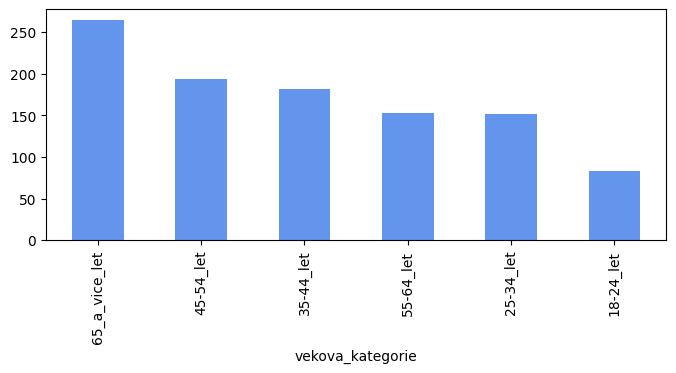

In [35]:
df['vekova_kategorie'].value_counts(ascending=False).plot(kind='bar', figsize=(8,3), color="#6495ED")

In [36]:
pio.renderers.default = 'browser'

fig = px.box(df,
             x='vek',
             y='ekonomicke_postaveni',
             template='plotly_white'
            )
fig.show()

#co je divné: ne/pracující důchodkyně - vě věku před 65 lety - možnost předčasného důchodu/invalidního důchodu

In [37]:
df['vzdelani_\n(rekod)'].value_counts(normalize=True)

vzdelani_\n(rekod)
zs/ss_bez_maturity    0.428432
ss_s_maturitou        0.352483
vs/vos                0.219085
Name: proportion, dtype: float64

<Axes: xlabel='vzdelani_\n(rekod)'>

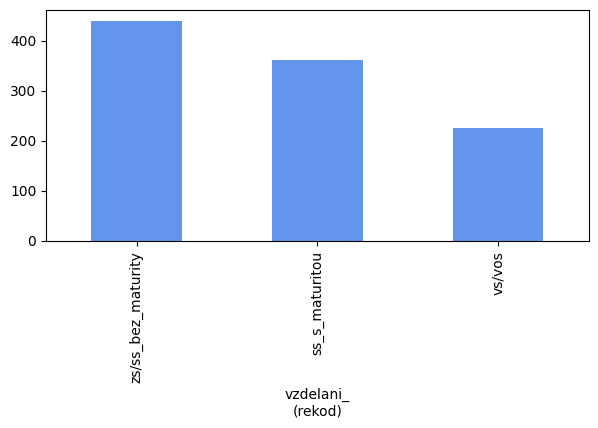

In [38]:
df['vzdelani_\n(rekod)'].value_counts().plot(kind='bar', figsize=(7,3), color="#6495ED")

#jelikož 40% respondentů je 55+ => H: většina z nich bude mít jen ZŠ vzdělání/SŠ bez maturity

In [39]:
fig = px.histogram(df,
             x='volbastrany_odpoved',
             template='plotly_white',
             ).update_xaxes(categoryorder='total descending')
fig.show()

#většina dotazovaných nechce uvést politickou stranu, pro kterou volí nebo nevolí vůbec.
# 1. ANO - převažující politická strana
# 2. SPOLU
# 3. STACILO 

In [40]:
fig = px.box(df,
             x='vek',
             y='volbastrany_odpoved',
             template='plotly_white'
            )
fig.show()

#Voliči ANO a STACILO jsou většinou postaršího věku
#Zejména mladí volá PIRATY


In [41]:
df['kraj'].value_counts(normalize=True)

kraj
stredocesky_kraj        0.132425
praha                   0.125609
jihomoravsky_kraj       0.112950
moravskoslezsky_kraj    0.111977
ustecky_kraj            0.071081
jihocesky_kraj          0.060370
olomoucky_kraj          0.058423
plzensky_kraj           0.054528
kralovehradecky_kraj    0.051607
zlinsky_kraj            0.051607
pardubicky_kraj         0.048685
kraj_vysocina           0.047712
liberecky_kraj          0.042843
karlovarsky_kraj        0.030185
Name: proportion, dtype: float64

<Axes: xlabel='kraj'>

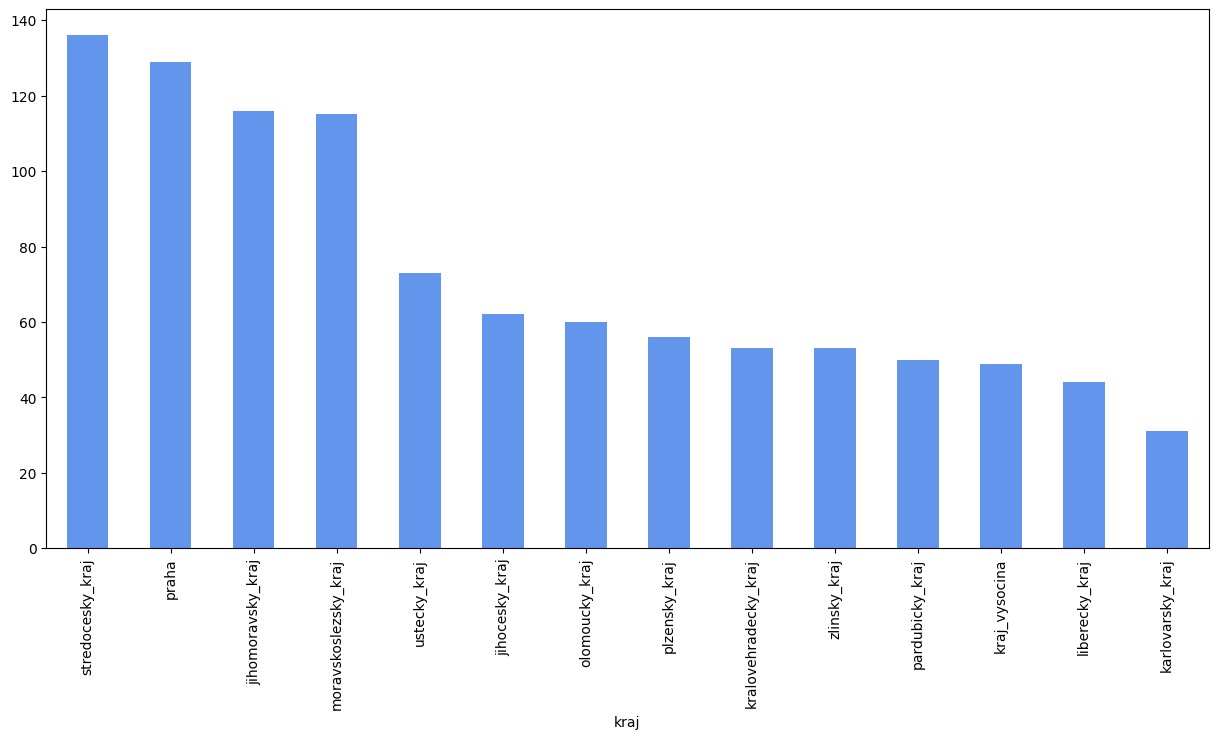

In [42]:
df['kraj'].value_counts().plot(kind='bar', figsize=(15,7), color="#6495ED")

In [43]:
df['ekonomicke_postaveni'].value_counts(normalize=True)

ekonomicke_postaveni
v_zamestnaneckem_pomeru                                    0.441091
nepracujici_duchodce/kyne                                  0.272639
na_materske/rodicovske_dovolene                            0.074976
pracujici_duchodce/kyne                                    0.057449
soukromy/a_podnikatel(ka)                                  0.046738
student(ka),_zak(yne),_ucen/nice_bez_staleho_zamestnani    0.037001
nezamestnany/a                                             0.031159
v_domacnosti                                               0.021422
student(ka),_zak(yne),_ucen/nice_se_stalym_zamestnanim     0.017527
Name: proportion, dtype: float64

<Axes: title={'center': 'Ekonomické postavení'}, ylabel='ekonomicke_postaveni'>

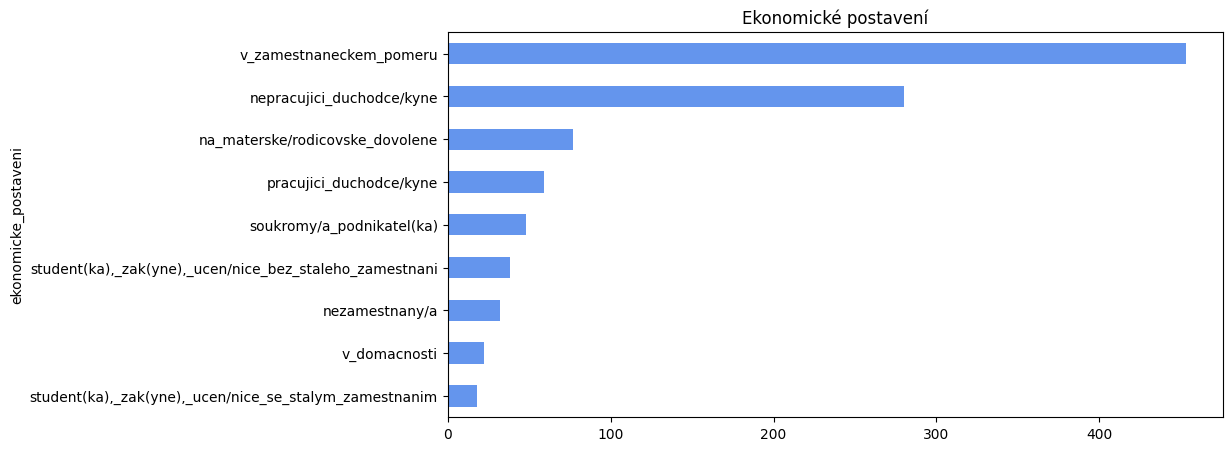

In [44]:
df['ekonomicke_postaveni'].value_counts(ascending=True).plot(
    kind='barh',  # Horizontální sloupcový graf
    figsize=(10, 5),  # Velikost grafu
    color="#6495ED",  # Barva sloupců
    title="Ekonomické postavení")

#nejvíce ZAM -> socko+zdrávko odvádí zaměstnavatelé - mají míň starostí, naopak se jim to odečítá ze mzdy => budou mít zajímavý názor? př. PODPORA_ placení

In [45]:
df['cisty_prijem_domacnosti'].value_counts(normalize=True)


cisty_prijem_domacnosti
20_000_kc_-_49_999_kc      0.474197
50_000_kc_-_74_999_kc      0.218111
odmitam_odpovedet          0.098345
do_19_999_kc               0.095424
75_000_kc_-_99_999_kc      0.059396
nevim                      0.026290
100_000_kc_-_149_000_kc    0.021422
150_000_kc_a_vice          0.006816
Name: proportion, dtype: float64

<Axes: ylabel='cisty_prijem_domacnosti'>

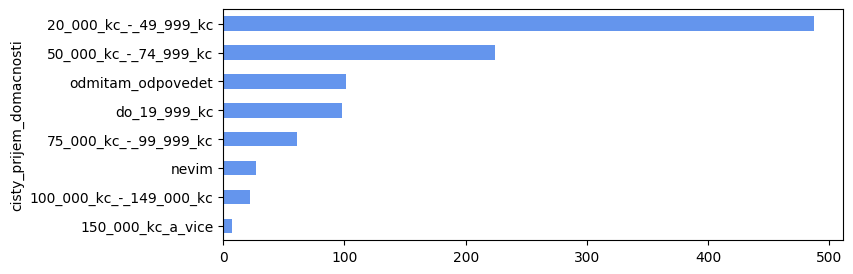

In [46]:
df['cisty_prijem_domacnosti'].value_counts(ascending=True).plot(kind='barh', figsize=(8,3),color="#6495ED")

#Polovina respondentů spadá do kategorie 20-50 tis Kč
#Q: jaký pohled mají na příspěvky na zdrav. 20-50k x 100k+
#H: 100k+ s tím nemají moc velký problém, naopak x<20k velký díl měsíčního budgetu
    #NAOPAK x<20k uvítávají VZ (veřejné zdravotnictví)

#Průměrná mzda pro rok 2024 činila 43 967 Kč 

In [47]:
df['prijem_kategorie'].value_counts(normalize=True)

#Skoro 70 % dotazovaných má střední příjem


prijem_kategorie
stredni_prijem    0.692308
neurceno          0.124635
nizky_prijem      0.095424
vysoky_prijem     0.087634
Name: proportion, dtype: float64

<Axes: ylabel='prijem_kategorie'>

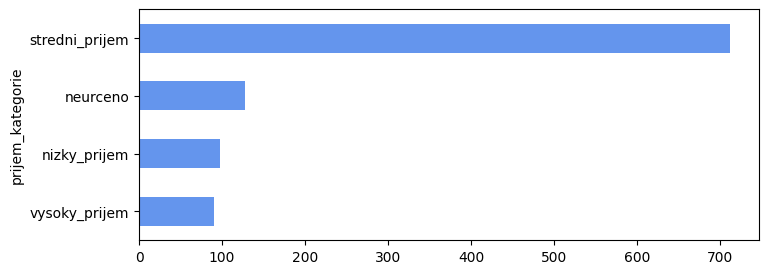

In [48]:
df['prijem_kategorie'].value_counts(ascending=True).plot(kind='barh', figsize=(8,3),color="#6495ED")

In [49]:
def prepare_survey_data(df, question_prefixes=["PODPORA_"]):
    """
    Zpracuje data dotazníku a spočítá odpovědi pro každou otázku z více skupin prefixů.
    
    Args:
        df (pd.DataFrame): DataFrame s jednotlivými odpověďmi na otázky.
        question_prefixes (list): Seznam prefixů otázek, které se mají analyzovat.
    
    Returns:
        pd.DataFrame: Připravená data v dlouhém formátu.
    """
    counts = []
    # Iterace přes každý prefix
    for prefix in question_prefixes:
        # Filtruj otázky podle aktuálního prefixu
        question_columns = [col for col in df.columns if col.startswith(prefix)]
        
        # Spočítej výskyt odpovědí pro každou otázku
        for question in question_columns:
            count_data = df[question].value_counts().reset_index()
            count_data.columns = ["kategorie", "pocet"]
            count_data["otazka"] = question
            counts.append(count_data)
    
    # Spoj všechny otázky do jednoho DataFrame
    result_df = pd.concat(counts, ignore_index=True)
    
    return result_df

# Použití funkce s více prefixy
processed_data = prepare_survey_data(df, question_prefixes=["PODPORA_", "prerozdeleni_"])

# Ukázka výsledku
print(processed_data)

             kategorie  pocet  \
0     spise_prijatelne    313   
1   spise_neprijatelne    295   
2   zcela_neprijatelne    259   
3    nevim/nemam_nazor     91   
4     zcela_prijatelne     69   
..                 ...    ...   
65    spise_prijatelne    356   
66   nevim/nemam_nazor    231   
67  spise_neprijatelne    183   
68    zcela_prijatelne    175   
69  zcela_neprijatelne     82   

                                               otazka  
0                                PODPORA_vyssi_platby  
1                                PODPORA_vyssi_platby  
2                                PODPORA_vyssi_platby  
3                                PODPORA_vyssi_platby  
4                                PODPORA_vyssi_platby  
..                                                ...  
65  prerozdeleni_prerozdeleni_financi_bych_nemenil...  
66  prerozdeleni_prerozdeleni_financi_bych_nemenil...  
67  prerozdeleni_prerozdeleni_financi_bych_nemenil...  
68  prerozdeleni_prerozdeleni_financi_bych_

In [50]:
# Pořadí kategorií pro sloupce PODPORA_, prerozdeleni_
category_order = [
    "zcela_prijatelne",
    "spise_prijatelne",
    "nevim/nemam_nazor",
    "spise_neprijatelne",
    "zcela_neprijatelne"
]

# Barevné schéma
color_map = {
    "zcela_prijatelne": "#4a90e2",  # Modrá
    "spise_prijatelne": "#6bb5f5",  # Světle modrá
    "nevim/nemam_nazor": "#d3d3d3",  # Šedá
    "spise_neprijatelne": "#f7685b",  # Světle červená
    "zcela_neprijatelne": "#d0021b"  # Červená
}

# Uspořádání kategorií v datech
processed_data["kategorie"] = pd.Categorical(
    processed_data["kategorie"],
    categories=category_order,
    ordered=True
)

In [51]:
podpora_data = prepare_survey_data(df, question_prefixes=["PODPORA_"])
                                   
fig = px.bar(
    podpora_data,
    x="pocet",
    y="otazka",
    color="kategorie",
    orientation="h",
    title="Podpora různých opatření podle kategorií odpovědí",
    labels={"pocet": "Počet odpovědí", "otazka": "Opatření"},
    category_orders={"kategorie": category_order},
    color_discrete_map=color_map  # Přizpůsobené barvy
)

# Zobrazení legendy nahoře
fig.update_layout(
    legend=dict(
        orientation="h",  # Horizontální orientace
        x=0.5,            # Umístění na střed
        xanchor="center", # Zarovnání na střed
        y=1.2,            # Nad graf
    )
)

# Zobrazení grafu
fig.show()

In [52]:

prerozdeleni_data = prepare_survey_data(df, question_prefixes=["prerozdeleni_"])
                                   
fig = px.bar(
    prerozdeleni_data,
    x="pocet",
    y="otazka",
    color="kategorie",
    orientation="h",
    title="Které z následujících přerozdělení peněz je pro vás přijatelné",
    labels={"pocet": "Počet odpovědí", "otazka": "Přerozdělení peněz"},
    category_orders={"kategorie": category_order},
    color_discrete_map=color_map  # Přizpůsobené barvy
)

# Zobrazení legendy nahoře
fig.update_layout(
    legend=dict(
        orientation="h",  # Horizontální orientace
        x=0.5,            # Umístění na střed
        xanchor="center", # Zarovnání na střed
        y=1.2,            # Nad graf
    )
)

# Zobrazení grafu
fig.show()

Výsledky:
70% dotazovaných podporuje finanční zvýhodnění v případě ohleduplného chování k vlastnímu zdraví
Polovina dotazovaných by akceptovala výběr mezi různými druhy pojištění s odlišným pojistným

Naopak 83% neakceptuje osobní hrazení drahé péče nad 10mil Kč
Většina nepodporuje prodloužení čekací doby na ošetření a zmenšení počtu zdravotnických zařízení


<Axes: xlabel='jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?'>

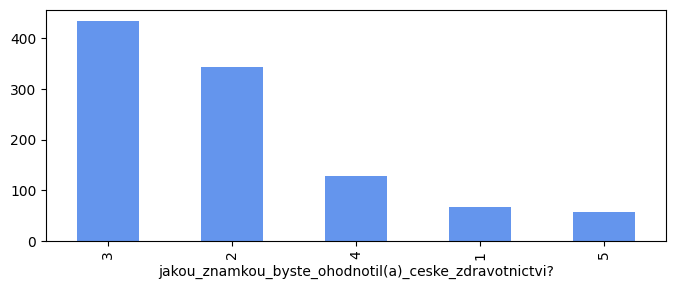

In [53]:
df['jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?'].value_counts().plot(kind='bar', figsize=(8,3),color="#6495ED")

#většina dotazovaných hodnotí české zdravotnictví jako průměrné, tedy známkou 2-3

In [54]:
def prepare_survey_data(df, question_prefixes=["HODNOCENI_"]):
    counts = []
    for prefix in question_prefixes:
        question_columns = [col for col in df.columns if col.startswith(prefix)]
        for question in question_columns:
            count_data = df[question].value_counts().reset_index()
            count_data.columns = ["kategorie", "pocet"]
            count_data["otazka"] = question
            counts.append(count_data)
    
    result_df = pd.concat(counts, ignore_index=True)
    return result_df

# Zpracování dat pro HODNOCENI_
hodnoceni_data = prepare_survey_data(df, question_prefixes=["HODNOCENI_"])

# Definice pořadí kategorií a barevného schématu
category_order_HODNOCENI = [1, 2, 3, 4, 5]  # Změněno na celá čísla
color_map_HODNOCENI = {
    1: "#4a90e2",  # Modrá
    2: "#6bb5f5",  # Světle modrá
    3: "#d3d3d3",  # Šedá
    4: "#f7685b",  # Světle červená
    5: "#d0021b"   # Červená
}

# Uspořádání kategorií v datech
hodnoceni_data["kategorie"] = pd.Categorical(
    hodnoceni_data["kategorie"],
    categories=category_order_HODNOCENI,
    ordered=True
)

# Vytvoření grafu
fig = px.bar(
    hodnoceni_data,
    x="pocet",
    y="otazka",
    color="kategorie",
    orientation="h",
    title="Hodnocení zvolených kategorií českého zdravotnictví",
    labels={"pocet": "Počet odpovědí", "otazka": "Hodnocení"},
    category_orders={"kategorie": category_order_HODNOCENI},
    color_discrete_map=color_map_HODNOCENI
)

# Uložení legendy nahoře
fig.update_layout(
    legend=dict(
        orientation="h",
        x=0.5,
        xanchor="center",
        y=1.2,
    )
)

# Zobrazení grafu
fig.show()

Výsledky:
Dotazovaní jsou nejvíce spokojeni se svým praktickým lékařem.
Obecně jsou spokojeni se zdravotními specialisty

Naopak nejhůře si vede ministerstvo zdravotnictví.


CLEVERMINER

In [55]:
#Transformace sloupců HODNOCENI_ na kategorický typ pro účely Clevermineru

# Vybrat sloupce začínající HODNOCENI_
hodnoceni_columns = [col for col in df.columns if col.startswith("HODNOCENI_")]

# Převést na kategorický typ
df[hodnoceni_columns] = df[hodnoceni_columns].astype('category')

# Ověření typu
print(df[hodnoceni_columns].dtypes)

# Ukázka kategorií
print(df[hodnoceni_columns].head())

HODNOCENI_zdravotni_pojistovny              category
HODNOCENI_zdravotnicka_zarizeni_/_lekari    category
HODNOCENI_ministerstvo_zdravotnictvi        category
HODNOCENI_nemocnice                         category
HODNOCENI_prakticky_lekar                   category
HODNOCENI_ambulantni_specialiste            category
dtype: object
  HODNOCENI_zdravotni_pojistovny HODNOCENI_zdravotnicka_zarizeni_/_lekari  \
0                              3                                        3   
1                              3                                        3   
2                              3                                        3   
3                              3                                        2   
4                              1                                        3   

  HODNOCENI_ministerstvo_zdravotnictvi HODNOCENI_nemocnice  \
0                                    4                   1   
1                                    3                   2   
2                  

In [56]:
df['prijem_kategorie'].unique()

array(['stredni_prijem', 'neurceno', 'nizky_prijem', 'vysoky_prijem'],
      dtype=object)

In [57]:
df['prijem_kategorie'].unique()

# Pořadí kategorií pro sloupec prijem_kategorie
category_order_prijem_kategorie = [
    "neurceno",
    "nizky_prijem",
    "stredni_prijem",
    "vysoky_prijem",
]

df['prijem_kategorie'] = pd.Categorical(df['prijem_kategorie'], 
                                         categories=category_order_prijem_kategorie, 
                                         ordered=True)


In [58]:
clm = cleverminer(df=df)
clm.print_data_definition()

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need more categories and you know what you are doing, please use max_categories option to increase allowed number of categories.
 If you haven't set maximum number of categories and you really need mo

1. Analytická otázka
4ft Miner
"Jaké faktory (věk, ekonomické postavení, kraj, čistý příjem domácnosti) ovlivňují hodnocení českého zdravotnictví respondenty, kteří ohodnotili zdravotnictví známkou 4 nebo 5?"

Odpověď:
Z nalezených pravidel je vidět, že lidé 35let+ jsou ti, co jsou spíše nespokojeni s českým zdravotnictvím
Nízký a střední příjem koreluje s horším hodnocením zdravotnictví. (Na paměti: Střední příjem vykazuje z dat až 70 % dotazovaných)

Domněnky: Lidé s nižšími a středními příjmy mohou mít omezený přístup ke kvalitní péči nebo vyšší očekávání, která nejsou naplněna.


In [59]:
clm = cleverminer(df=df,proc='4ftMiner',
       quantifiers= {'Base':80, 'conf':0.6},
       ante ={
            'attributes':[
                {'name': 'jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?', 'type': 'rcut', 'minlen': 1, 'maxlen': 2}
            ], 'minlen':1, 'maxlen':2 , 'type':'con'},
       succ ={
             'attributes':[
                {'name': 'vekova_kategorie', 'type': 'seq', 'minlen': 1, 'maxlen': 3},
                {'name': 'ekonomicke_postaveni', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
                {'name': 'kraj', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
                {'name': 'prijem_kategorie', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
            ], 'minlen':1, 'maxlen':2, 'type':'con'},
       )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(8)



Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 31, rules 8, times: prep 0.12sec, processing 0.04sec

CleverMiner task processing summary:

Task type : 4ftMiner
Number of verifications : 31
Number of rules : 8
Total time needed : 00h 00m 00s
Time of data preparation : 00h 00m 00s
Time of rule mining : 00h 00m 00s


List of rules:
RULEID BASE  CONF  AAD    Rule
     1   121 0.661 +0.286 jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?(5 4) => vekova_kategorie(35-44_let 45-54_let 55-64_let) | ---
     2   123 0.672 +0.130 jakou_znamkou_byste_ohodnot

In [60]:
#Zjistili jsme, že převážně ti co, jsou mají nízký a střední příjem, hodnotí české zdravotnictví známkou 4 nebo 5. 

# Převést DataFrame do vhodného formátu s počty
grouped_df = df.groupby(
    ['jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?', 'prijem_kategorie']
).size().reset_index(name='pocet')

# Vytvoření sloupcového grafu
fig = px.bar(
    grouped_df,
    x='jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?',
    y='pocet',
    color='prijem_kategorie',
    template='plotly_white',
    labels={
        'jakou_znamkou_byste_ohodnotil(a)_ceske_zdravotnictvi?': 'Známka',
        'pocet': 'Počet dotazovaných',
        'prijem_kategorie': 'Kategorie příjmu',
    },
    title='Rozdělení hodnocení českého zdravotnictví podle příjmových kategorií',
    category_orders={'prijem_kategorie': category_order_prijem_kategorie}  # Zajištění správného pořadí příjmových kategorií
)

# Zobrazení grafu
fig.show()




C:\Users\Hoang\AppData\Local\Temp\ipykernel_13124\972591470.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



2. Analytická otázka

Z EDA analýzy se zjistilo, že nejhůře z hlediska hodnocení si vede Ministerstvo zdravotnictví. 
"Jak vypadá skladba dotazovaných, kteří nejsou spokojeni s Ministerstvem zdravotnictvím?"

Odpověď:
Lidé 45let+, kteří jsou v zaměstnaneckém poměru či nepracující důchodce/kyně jsou ti, co jsou převážně nespokojeni s Ministerstvem zdravotnictví.
(Co se týče ekonomického postavení, tak nepracující důchodce/kyně a ti, v zaměstnaneckém poměru tvoří cca 70 % dotazovaných, výsledky mohou být tedy zkreslující)



In [61]:
clm = cleverminer(df=df,proc='4ftMiner',
       quantifiers= {'Base':100, 'conf':0.6},
       ante ={
            'attributes':[
                {'name': 'HODNOCENI_ministerstvo_zdravotnictvi', 'type': 'rcut', 'minlen': 1, 'maxlen': 2}
            ], 'minlen':1, 'maxlen':2 , 'type':'con'},
       succ ={
             'attributes':[
                {'name': 'vekova_kategorie', 'type': 'seq', 'minlen': 1, 'maxlen': 3},
                {'name': 'ekonomicke_postaveni', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
                {'name': 'kraj', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
                {'name': 'prijem_kategorie', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
            ], 'minlen':1, 'maxlen':3, 'type':'con'},
       )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(8)

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
 66%|##################################                  |Elapsed Time: 0:00:00
 67%|###################################                 |Elapsed Time: 0:00:00
 67%|###################################                 |Elapsed Time: 0:00:00
 68%|###################################                 |Elapsed Time: 0:00:00
 70%|####################################                |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 413, rules 12, times: prep 0.16sec, processing 0.34sec

CleverMiner task processing summary:

Task type : 4ftM

3. Analytická otázka
"Co by lidé nespokojeni s aktuální politikou ministerstva zdravotnictví podpořili, pro zlepšení finanční situace zdravotnictví?"

Odpověď:
Dotazovnaí by přijali s vyšší podporou přerozdělení peněz z obrany do zdravotnictví. 
Naopak rozhodně nepodporují snížení sociálních dávek/důchodu a peněz do školství na úkor zdravotnictví. 
Dotazovaní by dále byli ochotni dojíždět za léčbou maximálně do zdravotnického zařízení vzdáleného do 1 hodiny. Je tedy v zájmu Ministerstva zdravotnictví nesnižovat počet zdravotnických zařízení. 


In [62]:
clm = cleverminer(df=df,proc='4ftMiner',
       quantifiers= {'Base':100, 'conf':0.6},
       ante ={
            'attributes':[
                {'name': 'HODNOCENI_ministerstvo_zdravotnictvi', 'type': 'rcut', 'minlen': 1, 'maxlen': 2},
            ], 'minlen':1, 'maxlen':2 , 'type':'con'},
       succ ={
             'attributes':[
                {'name': 'jak_daleko_byste_byl(a)_ochotny/a_dojizdet_za_objektivne_kvalitnejsi_nebo_rychleji_dostupnou_peci_v_pripade_vazneho_zdravotniho_problemu?', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_skolstvi', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_obrany', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_socialnich_davek_a_duchodu', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_jinych_rezortu', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_prerozdeleni_financi_bych_nemenil(a),_uspory_by_se_mely_hledat_uvnitr_zdravotnictvi_', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
            ], 'minlen':1, 'maxlen':3, 'type':'con'},
       )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(8)

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 193, rules 3, times: prep 0.10sec, processing 0.06sec

CleverMiner task processing summary:

Task type : 4ftMiner
Number of verifications : 193
Number of rules : 3
Total time needed : 00h 00m 00s
Time of data preparation : 00h 00m 00s
Time of rule mining : 00h 00m 00s


List of rules:
RULEID BASE  CONF  AAD    Rule
     1   156 0.629 -0.033 HODNOCENI_ministerstvo_zdravotnictvi(5) => jak_daleko_byste_byl(a)_ochotny/a_dojizdet_za_objektivne_kvalitnejsi_nebo_rychleji_dostupnou_peci_v_pripade_vazneho_zdravotn

4. Analytická otázka

Je pohled dotazovaných na situaci stejný nezáleže na volbě politické strany?

Odpověď:
Z navazující analýzy vychází, že volič skoro jakékoliv politické strany podporuje přerozdělení peněz z jiného rezortu do zdravotnictví, i například snížením již zmíněných finančních prostředku do obrany

In [63]:
clm = cleverminer(df=df,proc='4ftMiner',
       quantifiers= {'Base':150, 'conf':0.7},
       ante ={
            'attributes':[
                {'name': 'HODNOCENI_ministerstvo_zdravotnictvi', 'type': 'rcut', 'minlen': 1, 'maxlen': 2},
                {'name': 'volbastrany_odpoved', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
            ], 'minlen':1, 'maxlen':2 , 'type':'con'},
       succ ={
             'attributes':[
                {'name': 'jak_daleko_byste_byl(a)_ochotny/a_dojizdet_za_objektivne_kvalitnejsi_nebo_rychleji_dostupnou_peci_v_pripade_vazneho_zdravotniho_problemu?', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_skolstvi', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_obrany', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_socialnich_davek_a_duchodu', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_vice_penez_do_zdravotnictvi,_mene_do_jinych_rezortu', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
                {'name': 'prerozdeleni_prerozdeleni_financi_bych_nemenil(a),_uspory_by_se_mely_hledat_uvnitr_zdravotnictvi_', 'type': 'seq', 'minlen': 1, 'maxlen': 2},
            ], 'minlen':1, 'maxlen':3, 'type':'con'},
       )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(8)

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
 54%|############################                        |Elapsed Time: 0:00:00
 64%|#################################                   |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 314, rules 0, times: prep 0.09sec, processing 0.18sec

CleverMiner task processing summary:

Task type : 4ftMiner
Number of verifications : 314
Number of rules : 0
Total time needed : 00h 00m 00s
Time of data preparation : 00h 00m 00s
Time of rule mining : 00h 00m 00s


List of rules:
RULEID BASE  CONF  AAD    Rule


No such rule.


5. Analytická otázka

Z EDA analýzy vyšlo, že v případě nedostatku financí v rezortu zdravotnictví by lidé pro udržení kvality a dostupnosti nejvíce přijali takové politické řešení, kde by se finančně zvýhodňovalo ohleduplné chování k vlastnímu zdraví. Na 2. místě by podpořili mít možnost výběru zdravotního pojištění za cenově různé pojistné.

Otázka:
"Kdo a z jaké příjmové kategorie by byl nejvíce ochotný zaplatit si vyšší pojistné za více obdržených služeb?"


Odpověď:
Mladí 18-34 let se středním-vysokým příjmem jsou spíše ochotni si připlatit navíc za nadstandartní životní pojištění
Mladí si jsou vědomi neudržitelného financování v zdravotnictví a jsou tak ochotni si připlatit. 

In [64]:
clm = cleverminer(
    df=df,
    proc='4ftMiner',
    quantifiers={
        'Base': 10,  # Minimální počet dotazovaných v dané skupině
        'conf': 0.5  # Relativní četnost zvýšená o 50 % oproti celému souboru
    },
    ante={
        'attributes': [
            {'name': 'vekova_kategorie', 'type': 'subset', 'minlen': 1, 'maxlen': 2},
            {'name': 'prijem_kategorie', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
        ],
        'minlen': 1,
        'maxlen': 2,
        'type': 'con'
    },
    succ={
        'attributes': [
            {'name': 'byl(a)_byste_ochotny/a_si_priplatit_za_nadstandardni_zdravotni_pojisteni_u_zdravotni_pojistovny,_ktera_vam_nabidne_kvalitnejsi_nebo_sirsi_pokryti_sluzeb?__', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
        ],
        'minlen': 1,
        'maxlen': 1,
        'type': 'con'
    }
)

# Výstupy
clm.print_summary()
clm.print_rulelist()
 

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 808, rules 5, times: prep 0.09sec, processing 0.03sec

CleverMiner task processing summary:

Task type : 4ftMiner
Number of verifications : 808
Number of rules : 5
Total time needed : 00h 00m 00s
Time of data preparation : 00h 00m 00s
Time of rule mining : 00h 00m 00s


List of rules:
RULEID BASE  CONF  AAD    Rule
     1    22 0.524 +0.587 vekova_kategorie(18-24_let) & prijem_kategorie(stredni_prijem) => byl(a)_byste_ochotny/a_si_priplatit_za_nadstandardni_zdravotni_pojisteni_u_zdravotni_pojistovny,_kter

CF MINER


6. Analytická otázka

Je zde skupina respondentů, kteří mají negativní pohled na budoucnost českého zdravotnictví (naváznost na odpovědi ohledně jistých Výroků)



In [65]:
# Definice pořadí hodnot
order_mapping_VYROK = {
    'vyroku_nerozumim': 3,
    'vyroku_verim': 1,
    'o_vyroku_pochybuji': 2,
    'vyroku_neverim': 4
}

# Aplikace pořadí na příslušné sloupce
for col in ['VYROK_vic_senioru_vic_nakladu', 
            'VYROK_drazsi_leky', 
            'VYROK_mene_sester_lekaru', 
            'VYROK_mene_pracujicich_mene_zdroju', 
            'VYROK_zlepseni_pouze_vice_penezi']:
    df[col] = df[col].map(order_mapping_VYROK)

In [66]:
# Definice pořadí hodnot
order_mapping_Efektivita = {
    'nevim/nedokazu_posoudit': 3,
    'urcite_ano': 1,
    'spise_ano': 2,
    'spise_ne': 4,
    'urcite_ne': 5
}

# Převedení hodnot na číselné pořadí
df['myslite_si,_ze_by_politicke_strany_mely_aktivneji_resit_efektivitu_ve_zdravotnictvi?'] = (
    df['myslite_si,_ze_by_politicke_strany_mely_aktivneji_resit_efektivitu_ve_zdravotnictvi?']
    .map(order_mapping_Efektivita)
)

# Volitelně zobrazte výsledný dataset pro kontrolu
print(df[['myslite_si,_ze_by_politicke_strany_mely_aktivneji_resit_efektivitu_ve_zdravotnictvi?']].head())

   myslite_si,_ze_by_politicke_strany_mely_aktivneji_resit_efektivitu_ve_zdravotnictvi?
0                                                  2                                   
1                                                  2                                   
2                                                  3                                   
3                                                  2                                   
4                                                  4                                   


In [67]:
cfm6 = cleverminer(
    df=df,
    target='myslite_si,_ze_by_politicke_strany_mely_aktivneji_resit_efektivitu_ve_zdravotnictvi?',
    proc='CFMiner',
    quantifiers={
        'S_Down': 1,  
        'Base': 300   
    },
    cond={
        'attributes': [
            {'name': 'VYROK_vic_senioru_vic_nakladu', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
            {'name': 'VYROK_drazsi_leky', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
            {'name': 'VYROK_mene_sester_lekaru', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
            {'name': 'VYROK_mene_pracujicich_mene_zdroju', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
            {'name': 'VYROK_zlepseni_pouze_vice_penezi', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
        ],
        'minlen': 1,
        'maxlen': 2,
        'type': 'con'  # Condition type: conjunction
    }
)

# Generate results
cfm6.print_rulelist()
cfm6.print_summary()
cfm6.print_rule(1)

Cleverminer version 1.1.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  CFMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 13, rules 13, times: prep 0.11sec, processing 0.01sec

List of rules:
RULEID BASE  S_UP  S_DOWN Condition
     1   634     0     3 VYROK_vic_senioru_vic_nakladu(2)
     2   452     0     3 VYROK_vic_senioru_vic_nakladu(2) & VYROK_drazsi_leky(2)
     3   549     0     3 VYROK_vic_senioru_vic_nakladu(2) & VYROK_mene_sester_lekaru(2)
     4   461     0     3 VYROK_vic_senioru_vic_nakladu(2) & VYROK_mene_pracujicich_mene_zdroju(2)
     5   639     0     3 VYROK_drazsi_leky(2)
     6   538     0     3 VYROK_dra

jjj
